In [267]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.decomposition import PCA

In [268]:
df =pd.read_excel('C:\\Users\\saira\\OneDrive\\Desktop\\DigitalEye\\dg.xlsx')
df

,Name,Age,Sex,wearables,Duration,onlineplatforms,Nature,screenillumination,workingyears,hoursspentdailycurricular,...,freqquencyofcomplaints,Severityofcomplaints,Ocularsymptomsobservedlately,Symptomsobservingatleasthalfofthetimes,Complaintsfrequency,frequencyofdryeyes,Schimers1Lefteye,Schimers1righteye,Schimers2Lefteye,Schimers2righteye
0,Syeda Afiya,22,2,1,2,1,2,2,1,1,...,1,1,5,3,3,2,12,13,16,14
1,Hemanth,24,1,1,2,2,2,1,2,1,...,0,0,6,3,1,1,25,28,30,32
2,Kranthi,23,1,5,1,2,2,3,3,4,...,1,2,5,3,2,1,8,6,9,8
3,Sk.M.A.Khadeer,23,1,1,2,2,2,1,1,1,...,1,1,3,2,3,1,13,14,15,14
4,B.Shravan kumar,27,1,3,2,2,1,1,1,1,...,0,0,7,2,2,3,34,32,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Rahul,27,1,3,1,2,2,3,1,1,...,0,0,1,4,2,2,23,26,29,30
296,Ganesh Nayak,27,1,1,2,1,2,3,1,1,...,0,0,6,3,1,2,26,22,27,25
297,Nitin Sharma,24,1,3,1,1,2,3,1,1,...,0,0,6,2,1,2,23,27,28,29
298,Mukul Saner,24,1,1,1,1,2,3,1,1,...,0,2,5,3,2,2,12,14,16,18


In [269]:
df.isnull().sum()

Name                                      0
Age                                       0
Sex                                       0
wearables                                 0
Duration                                  0
onlineplatforms                           0
Nature                                    0
screenillumination                        0
workingyears                              0
hoursspentdailycurricular                 0
hoursspentdailynoncurricular              0
Gadgetsused                               0
levelofgadjetwithrespecttoeyes            0
Distancekeptbetweeneyesandgadjet          0
Avgnighttimeusageperday                   0
Blinkingduringscreenusage                 0
Difficultyinfocusingafterusingscreens     0
freqquencyofcomplaints                    0
Severityofcomplaints                      0
Ocularsymptomsobservedlately              0
Symptomsobservingatleasthalfofthetimes    0
Complaintsfrequency                       0
frequencyofdryeyes              

In [270]:
df.describe()

,Age,Sex,wearables,Duration,onlineplatforms,Nature,screenillumination,workingyears,hoursspentdailycurricular,hoursspentdailynoncurricular,...,freqquencyofcomplaints,Severityofcomplaints,Ocularsymptomsobservedlately,Symptomsobservingatleasthalfofthetimes,Complaintsfrequency,frequencyofdryeyes,Schimers1Lefteye,Schimers1righteye,Schimers2Lefteye,Schimers2righteye
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,22.173333,1.553333,2.353333,1.323333,1.650000,1.833333,1.783333,1.566667,1.776667,2.213333,...,0.546667,0.596667,5.193333,3.303333,1.720000,2.083333,21.073333,21.560000,25.376667,25.733333
std,2.774096,0.497978,1.407750,0.588737,0.477767,0.373301,0.724434,0.730755,0.960833,1.035081,...,0.543575,0.674913,2.485265,1.108491,0.640025,0.671734,7.511059,7.377975,7.105614,7.050384
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,2.000000,8.000000,6.000000
25%,20.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,4.000000,3.000000,1.000000,2.000000,15.000000,16.000000,20.000000,21.750000
50%,22.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,0.000000,5.000000,3.000000,2.000000,2.000000,22.000000,22.500000,28.000000,28.000000
75%,24.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,1.000000,1.000000,6.000000,4.000000,2.000000,3.000000,27.000000,28.000000,31.000000,31.000000
max,28.000000,2.000000,5.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,...,2.000000,2.000000,9.000000,5.000000,3.000000,3.000000,35.000000,35.000000,35.000000,35.000000


In [271]:
df.shape

(300, 27)

In [272]:
def categorize_dry_eye_severity(value):
    if value < 5:
        return 'Severe Dry Eyes'
    elif 5 <= value <= 10:
        return 'Moderately Dry Eyes'
    elif 10 < value <= 15:
        return 'Mildly Dry Eyes'
    else:
        return 'Normal'

# Create a new column 'DryEyeSeverity' based on 'Schimers1Lefteye' values
df['Schimers1Lefteye_1'] = df['Schimers1Lefteye'].apply(categorize_dry_eye_severity)
# Create a new column 'DryEyeSeverity' based on 'Schimers1righteye' values
df['Schimers1righteye_1'] = df['Schimers1righteye'].apply(categorize_dry_eye_severity)

In [273]:
def categorize_dry_eye_severity1(value):
    if value < 3:
        return 'Severe Dry Eyes'
    elif 3 <= value <= 6:
        return 'Moderately Dry Eyes'
    elif 6 < value <= 10:
        return 'Mildly Dry Eyes'
    else:
        return 'Normal'
    
# Create a new column 'DryEyeSeverity' based on 'Schimers1Lefteye' values
df['Schimers2Lefteye_1'] = df['Schimers2Lefteye'].apply(categorize_dry_eye_severity1)
# Create a new column 'DryEyeSeverity' based on 'Schimers1righteye' values
df['Schimers2righteye_1'] = df['Schimers2righteye'].apply(categorize_dry_eye_severity1)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Name                                    300 non-null    object
 1   Age                                     300 non-null    int64 
 2   Sex                                     300 non-null    int64 
 3   wearables                               300 non-null    int64 
 4   Duration                                300 non-null    int64 
 5   onlineplatforms                         300 non-null    int64 
 6   Nature                                  300 non-null    int64 
 7   screenillumination                      300 non-null    int64 
 8   workingyears                            300 non-null    int64 
 9   hoursspentdailycurricular               300 non-null    int64 
 10  hoursspentdailynoncurricular            300 non-null    int64 
 11  Gadget

In [275]:
df = df.drop(['Name','Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'], axis=1)

In [276]:
df

,Age,Sex,wearables,Duration,onlineplatforms,Nature,screenillumination,workingyears,hoursspentdailycurricular,hoursspentdailynoncurricular,...,freqquencyofcomplaints,Severityofcomplaints,Ocularsymptomsobservedlately,Symptomsobservingatleasthalfofthetimes,Complaintsfrequency,frequencyofdryeyes,Schimers1Lefteye_1,Schimers1righteye_1,Schimers2Lefteye_1,Schimers2righteye_1
0,22,2,1,2,1,2,2,1,1,2,...,1,1,5,3,3,2,Mildly Dry Eyes,Mildly Dry Eyes,Normal,Normal
1,24,1,1,2,2,2,1,2,1,1,...,0,0,6,3,1,1,Normal,Normal,Normal,Normal
2,23,1,5,1,2,2,3,3,4,4,...,1,2,5,3,2,1,Moderately Dry Eyes,Moderately Dry Eyes,Mildly Dry Eyes,Mildly Dry Eyes
3,23,1,1,2,2,2,1,1,1,1,...,1,1,3,2,3,1,Mildly Dry Eyes,Mildly Dry Eyes,Normal,Normal
4,27,1,3,2,2,1,1,1,1,1,...,0,0,7,2,2,3,Normal,Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,27,1,3,1,2,2,3,1,1,1,...,0,0,1,4,2,2,Normal,Normal,Normal,Normal
296,27,1,1,2,1,2,3,1,1,2,...,0,0,6,3,1,2,Normal,Normal,Normal,Normal
297,24,1,3,1,1,2,3,1,1,1,...,0,0,6,2,1,2,Normal,Normal,Normal,Normal
298,24,1,1,1,1,2,3,1,1,1,...,0,2,5,3,2,2,Mildly Dry Eyes,Mildly Dry Eyes,Normal,Normal


In [277]:
# Separate features and target variables
X_train_1 = df.drop(['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1'], axis=1)
y_train_1 = df[['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1']]


Feature Importances:
                                        Importance
Severityofcomplaints                      0.167360
Age                                       0.079595
freqquencyofcomplaints                    0.075933
Ocularsymptomsobservedlately              0.064633
Complaintsfrequency                       0.050153
hoursspentdailycurricular                 0.049140
Symptomsobservingatleasthalfofthetimes    0.048105
Avgnighttimeusageperday                   0.043675
hoursspentdailynoncurricular              0.041471
wearables                                 0.036922
workingyears                              0.035946
screenillumination                        0.035648
frequencyofdryeyes                        0.035271
Difficultyinfocusingafterusingscreens     0.033242
onlineplatforms                           0.031968
Gadgetsused                               0.031260
Duration                                  0.027677
Distancekeptbetweeneyesandgadjet          0.027605
Nature    

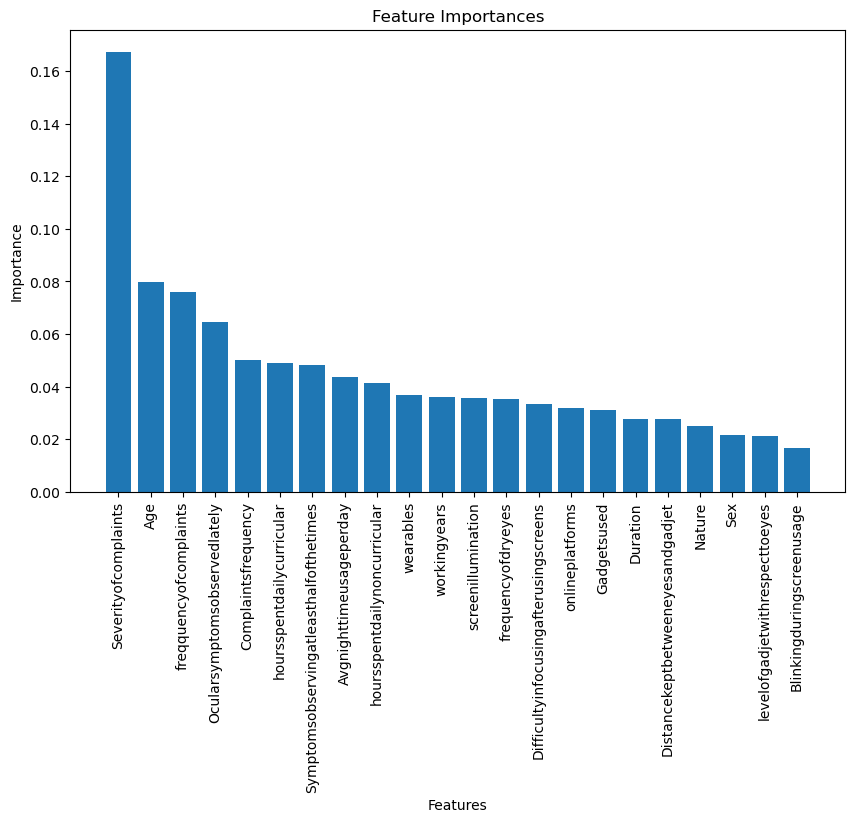

In [278]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Assuming 'X_train' contains your training features and 'y_train' contains your target variable
# Initialize a Random Forest classifier
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train_1, y_train_1)

# Extract feature importances
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train_1.columns, columns=['Importance'])

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


## importance value >= 0.03 are taken into consideration

In [279]:
df.columns

Index(['Age', 'Sex', 'wearables', 'Duration', 'onlineplatforms', 'Nature',
       'screenillumination', 'workingyears', 'hoursspentdailycurricular',
       'hoursspentdailynoncurricular', 'Gadgetsused',
       'levelofgadjetwithrespecttoeyes', 'Distancekeptbetweeneyesandgadjet',
       'Avgnighttimeusageperday', 'Blinkingduringscreenusage',
       'Difficultyinfocusingafterusingscreens', 'freqquencyofcomplaints',
       'Severityofcomplaints', 'Ocularsymptomsobservedlately',
       'Symptomsobservingatleasthalfofthetimes', 'Complaintsfrequency',
       'frequencyofdryeyes', 'Schimers1Lefteye_1', 'Schimers1righteye_1',
       'Schimers2Lefteye_1', 'Schimers2righteye_1'],
      dtype='object')

In [280]:


# Drop unnecessary columns
X = df.drop(['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1','onlineplatforms',
            'onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 
             'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes','screenillumination'
], axis=1)
# X = df[['Severityofcomplaints','freqquencyofcomplaints','Age','Ocularsymptomsobservedlately','hoursspentdailynoncurricular','Complaintsfrequency']]
y1 = df['Schimers1Lefteye_1'] 
y2 = df['Schimers1righteye_1'] 
y3 = df['Schimers2Lefteye_1'] 
y4 = df['Schimers2righteye_1'] 
# Encode categorical variables if needed
# For example, if any other columns contain non-numeric data
# encoder = LabelEncoder()
# data['SomeColumn'] = encoder.fit_transform(data['SomeColumn'])



# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2= train_test_split(X, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.2, random_state=42)


# Initialize decision tree classifier
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = DecisionTreeClassifier(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf1.fit(X_train1, y_train1)
clf2.fit(X_train2, y_train2)
clf3.fit(X_train3, y_train3)
clf4.fit(X_train4, y_train4)

# Make predictions
y_pred1 = clf1.predict(X_test1)
y_pred2 = clf2.predict(X_test2)
y_pred3 = clf3.predict(X_test3)
y_pred4 = clf4.predict(X_test4)

# Evaluate the model
accuracy1 = accuracy_score(y_test1, y_pred1)
accuracy2 = accuracy_score(y_test2, y_pred2)
accuracy3 = accuracy_score(y_test3, y_pred3)
accuracy4 = accuracy_score(y_test4, y_pred4)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)
print("Accuracy3:", accuracy3)
print("Accuracy4:", accuracy4)

# Classification report
print("\nClassification Report1:")
print(classification_report(y_test1, y_pred1))

print("\nClassification Report2:")
print(classification_report(y_test2, y_pred2))

print("\nClassification Report3:")
print(classification_report(y_test3, y_pred3))

print("\nClassification Report4:")
print(classification_report(y_test4, y_pred4))

# Confusion matrix
print("\nConfusion Matrix1:")
print(confusion_matrix(y_test1, y_pred1))

# Confusion matrix
print("\nConfusion Matrix2:")
print(confusion_matrix(y_test2, y_pred2))

# Confusion matrix
print("\nConfusion Matrix3:")
print(confusion_matrix(y_test3, y_pred3))

# Confusion matrix
print("\nConfusion Matrix4:")
print(confusion_matrix(y_test4, y_pred4))




Accuracy1: 0.7
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Classification Report1:
                     precision    recall  f1-score   support

    Mildly Dry Eyes       0.33      0.31      0.32        13
Moderately Dry Eyes       0.17      0.33      0.22         3
             Normal       0.88      0.84      0.86        44

           accuracy                           0.70        60
          macro avg       0.46      0.49      0.47        60
       weighted avg       0.73      0.70      0.71        60


Classification Report2:
                     precision    recall  f1-score   support

    Mildly Dry Eyes       0.22      0.22      0.22         9
Moderately Dry Eyes       0.75      1.00      0.86         3
             Normal       0.87      0.87      0.87        47
    Severe Dry Eyes       0.00      0.00      0.00         1

           accuracy                           0.77        60
          macro avg       0.46      0.52      0

C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [281]:
validation_data=pd.read_excel('C:\\Users\\saira\\OneDrive\\Desktop\\DigitalEye\\valid.xlsx')
validation_data.info()
X_val = validation_data.drop(['Name','onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 
                              'levelofgadjetwithrespecttoeyes', 'Duration', 'Difficultyinfocusingafterusingscreens',
                              'frequencyofdryeyes','screenillumination'], axis=1)

# Make predictions on the validation dataset
y_val_pred1 = clf1.predict(X_val)
y_val_pred2 = clf2.predict(X_val)
y_val_pred3 = clf3.predict(X_val)
y_val_pred4 = clf4.predict(X_val)

# Print predicted values
print("Predicted values for Schimers1Lefteye_1:")
print(y_val_pred1)

print("\nPredicted values for Schimers1righteye_1:")
print(y_val_pred2)

print("\nPredicted values for Schimers2Lefteye_1:")
print(y_val_pred3)

print("\nPredicted values for Schimers2righteye_1:")
print(y_val_pred4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Name                                    9 non-null      object
 1   Age                                     9 non-null      int64 
 2   Sex                                     9 non-null      int64 
 3   wearables                               9 non-null      int64 
 4   Duration                                9 non-null      int64 
 5   onlineplatforms                         9 non-null      int64 
 6   Nature                                  9 non-null      int64 
 7   screenillumination                      9 non-null      int64 
 8   workingyears                            9 non-null      int64 
 9   hoursspentdailycurricular               9 non-null      int64 
 10  hoursspentdailynoncurricular            9 non-null      int64 
 11  Gadgetsuse

In [282]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'target_variables' is a DataFrame containing your four target variables
target_variables= df[['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1']]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each target variable column and encode its values
for column in target_variables.columns:
    df[column] = label_encoder.fit_transform(target_variables[column])

# Now, your target variables are encoded with numerical labels
# Replace 'severe' with 'moderate' in 'Schimers1Lefteye_category' column
df['Schimers1Lefteye_1'].replace('Severe Dry Eyes', 'Moderately Dry Eyes', inplace=True)

# Replace 'severe' with 'moderate' in 'Schimers1righteye_category' column
df['Schimers1righteye_1'].replace('Severe', 'Moderate', inplace=True)
print("Unique values in Schimers1Lefteye_1:", df['Schimers1Lefteye_1'].unique())
print("Unique values in Schimers1righteye_1:", df['Schimers1righteye_1'].unique())
print("Unique values in Schimers2Lefteye_1:", df['Schimers2Lefteye_1'].unique())
print("Unique values in Schimers2righteye_1:", df['Schimers2righteye_1'].unique())

Unique values in Schimers1Lefteye_1: [0 2 1 3]
Unique values in Schimers1righteye_1: [0 2 1 3]
Unique values in Schimers2Lefteye_1: [1 0]
Unique values in Schimers2righteye_1: [2 0 1]


In [283]:
target_variables

,Schimers1Lefteye_1,Schimers1righteye_1,Schimers2Lefteye_1,Schimers2righteye_1
0,Mildly Dry Eyes,Mildly Dry Eyes,Normal,Normal
1,Normal,Normal,Normal,Normal
2,Moderately Dry Eyes,Moderately Dry Eyes,Mildly Dry Eyes,Mildly Dry Eyes
3,Mildly Dry Eyes,Mildly Dry Eyes,Normal,Normal
4,Normal,Normal,Normal,Normal
...,...,...,...,...
295,Normal,Normal,Normal,Normal
296,Normal,Normal,Normal,Normal
297,Normal,Normal,Normal,Normal
298,Mildly Dry Eyes,Mildly Dry Eyes,Normal,Normal


In [284]:
df

,Age,Sex,wearables,Duration,onlineplatforms,Nature,screenillumination,workingyears,hoursspentdailycurricular,hoursspentdailynoncurricular,...,freqquencyofcomplaints,Severityofcomplaints,Ocularsymptomsobservedlately,Symptomsobservingatleasthalfofthetimes,Complaintsfrequency,frequencyofdryeyes,Schimers1Lefteye_1,Schimers1righteye_1,Schimers2Lefteye_1,Schimers2righteye_1
0,22,2,1,2,1,2,2,1,1,2,...,1,1,5,3,3,2,0,0,1,2
1,24,1,1,2,2,2,1,2,1,1,...,0,0,6,3,1,1,2,2,1,2
2,23,1,5,1,2,2,3,3,4,4,...,1,2,5,3,2,1,1,1,0,0
3,23,1,1,2,2,2,1,1,1,1,...,1,1,3,2,3,1,0,0,1,2
4,27,1,3,2,2,1,1,1,1,1,...,0,0,7,2,2,3,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,27,1,3,1,2,2,3,1,1,1,...,0,0,1,4,2,2,2,2,1,2
296,27,1,1,2,1,2,3,1,1,2,...,0,0,6,3,1,2,2,2,1,2
297,24,1,3,1,1,2,3,1,1,1,...,0,0,6,2,1,2,2,2,1,2
298,24,1,1,1,1,2,3,1,1,1,...,0,2,5,3,2,2,0,0,1,2


In [285]:
from sklearn.linear_model import LogisticRegression


# Assuming 'df' is your DataFrame containing your data

# Separate features (X) and target variables (y)
X = df.drop(['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1',
             'onlineplatforms','Sex','Distancekeptbetweeneyesandgadjet','levelofgadjetwithrespecttoeyes',
             'Blinkingduringscreenusage','Difficultyinfocusingafterusingscreens','workingyears','Duration',
             'Gadgetsused','Nature'], axis=1)

target_variables = ['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1']

# Train a logistic regression model for each target variable
models = {}
for target in target_variables:
    y = df[target]
    encoded_target = label_encoder.fit_transform(y)
    model = LogisticRegression(max_iter=5000)
    model.fit(X, encoded_target)
    models[target] = model

# Now, you have trained logistic regression models for each target variable


In [286]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Initialize lists to store accuracy scores and confusion matrices
accuracy_scores = []
confusion_matrices = {}

# Iterate over each trained logistic regression model
for target, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X, df[target], cv=5)  # 5-fold cross-validation
    accuracy_scores.append(scores.mean())
    
    # Make predictions using cross-validation
    predicted = cross_val_predict(model, X, df[target], cv=5)
    
    # Compute confusion matrix
    cm = confusion_matrix(df[target], predicted)
    confusion_matrices[target] = cm

# Display accuracy scores and confusion matrices
for target, score, cm in zip(models.keys(), accuracy_scores, confusion_matrices.values()):
    print(f"Target Variable: {target}")
    print(f"Accuracy Score: {score}")
    print("Confusion Matrix:")
    print(cm)
    print()


C:\Users\saira\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\saira\anaconda3\Lib\s

Target Variable: Schimers1Lefteye_1
Accuracy Score: 0.7566666666666666
Confusion Matrix:
[[ 11   6  41   0]
 [  9   4   5   0]
 [  9   0 212   0]
 [  1   1   1   0]]

Target Variable: Schimers1righteye_1
Accuracy Score: 0.7566666666666666
Confusion Matrix:
[[  6   7  37   0]
 [  5   8   4   3]
 [ 11   2 213   0]
 [  1   2   1   0]]

Target Variable: Schimers2Lefteye_1
Accuracy Score: 0.9733333333333333
Confusion Matrix:
[[  0   7]
 [  1 292]]

Target Variable: Schimers2righteye_1
Accuracy Score: 0.9566666666666667
Confusion Matrix:
[[  1   0  10]
 [  1   0   0]
 [  2   0 286]]



In [287]:


# Drop unnecessary columns
X = df.drop(['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1','onlineplatforms',
             'Sex','Distancekeptbetweeneyesandgadjet','levelofgadjetwithrespecttoeyes','Blinkingduringscreenusage',
             'workingyears','Duration','Gadgetsused','Nature'], axis=1)
# X = df[['Severityofcomplaints','freqquencyofcomplaints','Age','Ocularsymptomsobservedlately','hoursspentdailynoncurricular','Complaintsfrequency']]
y1 = df['Schimers1Lefteye_1'] 
y2 = df['Schimers1righteye_1'] 
y3 = df['Schimers2Lefteye_1'] 
y4 = df['Schimers2righteye_1'] 
# Encode categorical variables if needed
# For example, if any other columns contain non-numeric data
# encoder = LabelEncoder()
# data['SomeColumn'] = encoder.fit_transform(data['SomeColumn'])



# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2= train_test_split(X, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.2, random_state=42)


# Initialize decision tree classifier
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = DecisionTreeClassifier(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf1.fit(X_train1, y_train1)
clf2.fit(X_train2, y_train2)
clf3.fit(X_train3, y_train3)
clf4.fit(X_train4, y_train4)

# Make predictions
y_pred1 = clf1.predict(X_test1)
y_pred2 = clf2.predict(X_test2)
y_pred3 = clf3.predict(X_test3)
y_pred4 = clf4.predict(X_test4)

# Evaluate the model
accuracy1 = accuracy_score(y_test1, y_pred1)
accuracy2 = accuracy_score(y_test2, y_pred2)
accuracy3 = accuracy_score(y_test3, y_pred3)
accuracy4 = accuracy_score(y_test4, y_pred4)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)
print("Accuracy3:", accuracy3)
print("Accuracy4:", accuracy4)

# Classification report
print("\nClassification Report1:")
print(classification_report(y_test1, y_pred1))

print("\nClassification Report2:")
print(classification_report(y_test2, y_pred2))

print("\nClassification Report3:")
print(classification_report(y_test3, y_pred3))

print("\nClassification Report4:")
print(classification_report(y_test4, y_pred4))

# Confusion matrix
print("\nConfusion Matrix1:")
print(confusion_matrix(y_test1, y_pred1))

# Confusion matrix
print("\nConfusion Matrix2:")
print(confusion_matrix(y_test2, y_pred2))

# Confusion matrix
print("\nConfusion Matrix3:")
print(confusion_matrix(y_test3, y_pred3))

# Confusion matrix
print("\nConfusion Matrix4:")
print(confusion_matrix(y_test4, y_pred4))




Accuracy1: 0.65
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Classification Report1:
              precision    recall  f1-score   support

           0       0.17      0.15      0.16        13
           1       0.20      0.33      0.25         3
           2       0.84      0.82      0.83        44

    accuracy                           0.65        60
   macro avg       0.40      0.44      0.41        60
weighted avg       0.66      0.65      0.65        60


Classification Report2:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         9
           1       0.67      0.67      0.67         3
           2       0.89      0.85      0.87        47
           3       0.00      0.00      0.00         1

    accuracy                           0.75        60
   macro avg       0.45      0.46      0.46        60
weighted avg       0.77      0.75      0.76        60


Classification Report3:
              pre

C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [288]:
 df['Schimers1righteye_1'].unique()

array([0, 2, 1, 3])

In [289]:
validation_data=pd.read_excel('C:\\Users\\saira\\OneDrive\\Desktop\\DigitalEye\\valid.xlsx')
validation_data.info()
X_val = validation_data.drop(['Name','onlineplatforms','Sex','Distancekeptbetweeneyesandgadjet',
                              'levelofgadjetwithrespecttoeyes','Blinkingduringscreenusage','workingyears','Duration','Gadgetsused','Nature'], axis=1)

# Make predictions on the validation dataset
y_val_pred1 = clf1.predict(X_val)
y_val_pred2 = clf2.predict(X_val)
y_val_pred3 = clf3.predict(X_val)
y_val_pred4 = clf4.predict(X_val)

# Print predicted values
print("Predicted values for Schimers1Lefteye_1:")
print(y_val_pred1)

print("\nPredicted values for Schimers1righteye_1:")
print(y_val_pred2)

print("\nPredicted values for Schimers2Lefteye_1:")
print(y_val_pred3)

print("\nPredicted values for Schimers2righteye_1:")
print(y_val_pred4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Name                                    9 non-null      object
 1   Age                                     9 non-null      int64 
 2   Sex                                     9 non-null      int64 
 3   wearables                               9 non-null      int64 
 4   Duration                                9 non-null      int64 
 5   onlineplatforms                         9 non-null      int64 
 6   Nature                                  9 non-null      int64 
 7   screenillumination                      9 non-null      int64 
 8   workingyears                            9 non-null      int64 
 9   hoursspentdailycurricular               9 non-null      int64 
 10  hoursspentdailynoncurricular            9 non-null      int64 
 11  Gadgetsuse

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data=df.drop(['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 
               'Schimers2righteye_1'], axis=1)
# Define the columns you want to iterate through
columns_to_drop =['onlineplatforms','Sex','Distancekeptbetweeneyesandgadjet','levelofgadjetwithrespecttoeyes',
                  'Blinkingduringscreenusage','workingyears','Duration','Gadgetsused','Nature']

for column_to_drop in columns_to_drop:
    # Drop one column at a time
    X = data.drop(column_to_drop, axis=1)
    y1 = df['Schimers1Lefteye_1'] 
    y2 = df['Schimers1righteye_1'] 
    y3 = df['Schimers2Lefteye_1'] 
    y4 = df['Schimers2righteye_1'] 
    
    # Train-test split
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)
    X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.2, random_state=42)

    # Initialize decision tree classifier
    clf1 = DecisionTreeClassifier(random_state=42)
    clf2 = DecisionTreeClassifier(random_state=42)
    clf3 = DecisionTreeClassifier(random_state=42)
    clf4 = DecisionTreeClassifier(random_state=42)

    # Train the classifiers
    clf1.fit(X_train1, y_train1)
    clf2.fit(X_train2, y_train2)
    clf3.fit(X_train3, y_train3)
    clf4.fit(X_train4, y_train4)

    # Make predictions
    y_pred1 = clf1.predict(X_test1)
    y_pred2 = clf2.predict(X_test2)
    y_pred3 = clf3.predict(X_test3)
    y_pred4 = clf4.predict(X_test4)

    # Evaluate the models
    accuracy1 = accuracy_score(y_test1, y_pred1)
    accuracy2 = accuracy_score(y_test2, y_pred2)
    accuracy3 = accuracy_score(y_test3, y_pred3)
    accuracy4 = accuracy_score(y_test4, y_pred4)
    print(f"\nAccuracy for dropping column {column_to_drop}:")
    print("Accuracy1:", accuracy1)
    print("Accuracy2:", accuracy2)
    print("Accuracy3:", accuracy3)
    print("Accuracy4:", accuracy4)


Accuracy for dropping column onlineplatforms:
Accuracy1: 0.55
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping column Sex:
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping column Distancekeptbetweeneyesandgadjet:
Accuracy1: 0.5333333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping column levelofgadjetwithrespecttoeyes:
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping column Blinkingduringscreenusage:
Accuracy1: 0.55
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping column workingyears:
Accuracy1: 0.5333333333333333
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping column Duration:
Accuracy1: 0.5833333333333334
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for droppin

In [291]:
import random

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = df.drop(['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1'], axis=1)
# Define the columns you want to iterate through
columns_to_drop = ['onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes',
                   'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature']

# Define the maximum number of columns to drop randomly
max_columns_to_drop = len(columns_to_drop)  # No minimum number of columns to drop

for num_columns_to_drop in range(1, max_columns_to_drop + 1):
    # Randomly select columns to drop
    columns_to_drop_subset = random.sample(columns_to_drop, num_columns_to_drop)
    
    for column_to_drop in columns_to_drop_subset:
        # Drop columns
        X = data.drop(columns_to_drop_subset, axis=1)
        y1 = df['Schimers1Lefteye_1'] 
        y2 = df['Schimers1righteye_1'] 
        y3 = df['Schimers2Lefteye_1'] 
        y4 = df['Schimers2righteye_1'] 
        
        # Train-test split
        X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
        X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)
        X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.2, random_state=42)

        # Initialize decision tree classifier
        clf1 = DecisionTreeClassifier(random_state=42)
        clf2 = DecisionTreeClassifier(random_state=42)
        clf3 = DecisionTreeClassifier(random_state=42)
        clf4 = DecisionTreeClassifier(random_state=42)

        # Train the classifiers
        clf1.fit(X_train1, y_train1)
        clf2.fit(X_train2, y_train2)
        clf3.fit(X_train3, y_train3)
        clf4.fit(X_train4, y_train4)

        # Make predictions
        y_pred1 = clf1.predict(X_test1)
        y_pred2 = clf2.predict(X_test2)
        y_pred3 = clf3.predict(X_test3)
        y_pred4 = clf4.predict(X_test4)

        # Evaluate the models
        accuracy1 = accuracy_score(y_test1, y_pred1)
        accuracy2 = accuracy_score(y_test2, y_pred2)
        accuracy3 = accuracy_score(y_test3, y_pred3)
        accuracy4 = accuracy_score(y_test4, y_pred4)
        print(f"\nAccuracy for dropping columns {columns_to_drop_subset}:")
        print("Accuracy1:", accuracy1)
        print("Accuracy2:", accuracy2)
        print("Accuracy3:", accuracy3)
        print("Accuracy4:", accuracy4)

        


Accuracy for dropping columns ['onlineplatforms']:
Accuracy1: 0.55
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ['Nature', 'onlineplatforms']:
Accuracy1: 0.6
Accuracy2: 0.7166666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ['Nature', 'onlineplatforms']:
Accuracy1: 0.6
Accuracy2: 0.7166666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ['Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Nature']:
Accuracy1: 0.5166666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ['Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Nature']:
Accuracy1: 0.5166666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ['Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Nature']:


Accuracy for dropping columns ['workingyears', 'Duration', 'Gadgetsused', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'onlineplatforms', 'Blinkingduringscreenusage']:
Accuracy1: 0.6166666666666667
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ['workingyears', 'Gadgetsused', 'Distancekeptbetweeneyesandgadjet', 'Nature', 'Duration', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'onlineplatforms']:
Accuracy1: 0.65
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ['workingyears', 'Gadgetsused', 'Distancekeptbetweeneyesandgadjet', 'Nature', 'Duration', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'onlineplatforms']:
Accuracy1: 0.65
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ['workingyears', 'Gadgetsused', 'Distancekeptbetweeneyes

In [292]:
import random

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = df.drop(['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1'], axis=1)
# Define the columns you want to iterate through
columns_to_drop = ['onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes',
                   'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature','Difficultyinfocusingafterusingscreens'
                  ,'frequencyofdryeyes','screenillumination']
          
# Define the maximum number of columns to drop randomly
max_columns_to_drop = len(columns_to_drop)  # No minimum number of columns to drop

for num_columns_to_drop in range(1, max_columns_to_drop + 1):
    # Randomly select columns to drop
    columns_to_drop_subset = random.sample(columns_to_drop, num_columns_to_drop)
    
    for column_to_drop in columns_to_drop_subset:
        # Drop columns
        X = data.drop(columns_to_drop_subset, axis=1)
        y1 = df['Schimers1Lefteye_1'] 
        y2 = df['Schimers1righteye_1'] 
        y3 = df['Schimers2Lefteye_1'] 
        y4 = df['Schimers2righteye_1'] 
        
        # Train-test split
        X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
        X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)
        X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.2, random_state=42)

        # Initialize decision tree classifier
        clf1 = DecisionTreeClassifier(random_state=42)
        clf2 = DecisionTreeClassifier(random_state=42)
        clf3 = DecisionTreeClassifier(random_state=42)
        clf4 = DecisionTreeClassifier(random_state=42)

        # Train the classifiers
        clf1.fit(X_train1, y_train1)
        clf2.fit(X_train2, y_train2)
        clf3.fit(X_train3, y_train3)
        clf4.fit(X_train4, y_train4)

        # Make predictions
        y_pred1 = clf1.predict(X_test1)
        y_pred2 = clf2.predict(X_test2)
        y_pred3 = clf3.predict(X_test3)
        y_pred4 = clf4.predict(X_test4)

        # Evaluate the models
        accuracy1 = accuracy_score(y_test1, y_pred1)
        accuracy2 = accuracy_score(y_test2, y_pred2)
        accuracy3 = accuracy_score(y_test3, y_pred3)
        accuracy4 = accuracy_score(y_test4, y_pred4)
        print(f"\nAccuracy for dropping columns {columns_to_drop_subset}:")
        print("Accuracy1:", accuracy1)
        print("Accuracy2:", accuracy2)
        print("Accuracy3:", accuracy3)
        print("Accuracy4:", accuracy4)

   


Accuracy for dropping columns ['Duration']:
Accuracy1: 0.5833333333333334
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ['Nature', 'Distancekeptbetweeneyesandgadjet']:
Accuracy1: 0.5666666666666667
Accuracy2: 0.7
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ['Nature', 'Distancekeptbetweeneyesandgadjet']:
Accuracy1: 0.5666666666666667
Accuracy2: 0.7
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ['onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Sex']:
Accuracy1: 0.55
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ['onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Sex']:
Accuracy1: 0.55
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ['onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Sex']:
Accuracy1: 0.55
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accura


Accuracy for dropping columns ['workingyears', 'onlineplatforms', 'Nature', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'screenillumination', 'Sex', 'Gadgetsused', 'Blinkingduringscreenusage']:
Accuracy1: 0.6166666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ['workingyears', 'onlineplatforms', 'Nature', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'screenillumination', 'Sex', 'Gadgetsused', 'Blinkingduringscreenusage']:
Accuracy1: 0.6166666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ['workingyears', 'onlineplatforms', 'Nature', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'screenillumination', 'Sex', 'Gadgetsused', 'Blinkingduringscreenusage']:
Accuracy1: 0.6166666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accurac


Accuracy for dropping columns ['levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'screenillumination', 'Difficultyinfocusingafterusingscreens', 'Nature', 'Duration', 'Distancekeptbetweeneyesandgadjet', 'frequencyofdryeyes', 'onlineplatforms', 'Sex']:
Accuracy1: 0.6333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ['Difficultyinfocusingafterusingscreens', 'Gadgetsused', 'Sex', 'workingyears', 'levelofgadjetwithrespecttoeyes', 'Nature', 'Blinkingduringscreenusage', 'frequencyofdryeyes', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'screenillumination', 'onlineplatforms']:
Accuracy1: 0.6333333333333333
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ['Difficultyinfocusingafterusingscreens', 'Gadgetsused', 'Sex', 'workingyears', 'levelofgadjetwithrespecttoeyes', 'Nature', 'Blinkingduringscreenusage', 'frequencyofd

In [293]:
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = df.drop(['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1'], axis=1)
# Define the columns you want to iterate through
columns_to_drop = ['onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes',
                   'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature','Difficultyinfocusingafterusingscreens'
                  ,'frequencyofdryeyes','screenillumination']

# Train-test split for all targets
y1 = df['Schimers1Lefteye_1'] 
y2 = df['Schimers1righteye_1'] 
y3 = df['Schimers2Lefteye_1'] 
y4 = df['Schimers2righteye_1'] 

for num_columns_to_drop in range(1, len(columns_to_drop) + 1):
    # Generate combinations of columns to drop
    drop_combinations = combinations(columns_to_drop, num_columns_to_drop)
    
    for drop_combination in drop_combinations:
        # Drop columns
        X = data.drop(list(drop_combination), axis=1)
        
        # Train-test split for each target
        X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
        X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)
        X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.2, random_state=42)

        # Initialize decision tree classifiers
        clf1 = DecisionTreeClassifier(random_state=42)
        clf2 = DecisionTreeClassifier(random_state=42)
        clf3 = DecisionTreeClassifier(random_state=42)
        clf4 = DecisionTreeClassifier(random_state=42)

        # Train the classifiers
        clf1.fit(X_train1, y_train1)
        clf2.fit(X_train2, y_train2)
        clf3.fit(X_train3, y_train3)
        clf4.fit(X_train4, y_train4)

        # Make predictions
        y_pred1 = clf1.predict(X_test1)
        y_pred2 = clf2.predict(X_test2)
        y_pred3 = clf3.predict(X_test3)
        y_pred4 = clf4.predict(X_test4)

        # Evaluate the models
        accuracy1 = accuracy_score(y_test1, y_pred1)
        accuracy2 = accuracy_score(y_test2, y_pred2)
        accuracy3 = accuracy_score(y_test3, y_pred3)
        accuracy4 = accuracy_score(y_test4, y_pred4)
        print(f"\nAccuracy for dropping columns {drop_combination}:")
        print("Accuracy1:", accuracy1)
        print("Accuracy2:", accuracy2)
        print("Accuracy3:", accuracy3)
        print("Accuracy4:", accuracy4)



Accuracy for dropping columns ('onlineplatforms',):
Accuracy1: 0.55
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Sex',):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet',):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes',):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Blinkingduringscreenusage',):
Accuracy1: 0.55
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('workingyears',):
Accuracy1: 0.5333333333333333
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('Duration',):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4


Accuracy for dropping columns ('Blinkingduringscreenusage', 'Duration'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Blinkingduringscreenusage', 'Gadgetsused'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Blinkingduringscreenusage', 'Nature'):
Accuracy1: 0.55
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Blinkingduringscreenusage', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Blinkingduringscreenusage', 'frequencyofdryeyes'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Blinkingduringscreenusage', 'screenillumin


Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused'):
Accuracy1: 0.55
Accuracy2: 0.7333333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Nature'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accurac


Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'frequencyofdryeyes'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'workingyears'):
Accuracy1: 0.5166666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'Duration'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'Gadgetsused'):
Accuracy1: 0.6
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'Nature'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.6833333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('Dist


Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7333333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5166666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Nature', 'screenillumination'):
Accuracy1: 0.63333333333


Accuracy for dropping columns ('workingyears', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('workingyears', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Duration', 'Gadgetsused', 'Nature'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.8
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.8
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Duration', 'Gadgetsused', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Duration',


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'Gadgetsused'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'Nature'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'frequencyofdryeyes'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'screen


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Gadgetsused'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Nature'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.55
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'frequencyofdryeyes'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears


Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Duration', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.6833333333333333
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature'):
Accuracy1: 0.6
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'screenillumination'):
A


Accuracy for dropping columns ('onlineplatforms', 'workingyears', 'Nature', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'workingyears', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'workingyears', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'workingyears', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Duration', 'Gadgetsused', 'Nature'):
Accuracy1: 0.63333333333333


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7166666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration'):
Accuracy1: 0.55
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Gadgetsused'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Nature'):
Accuracy1: 0.55
Accuracy


Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.8
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.8166666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.56


Accuracy for dropping columns ('Sex', 'workingyears', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'workingyears', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'workingyears', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.6833333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Duration', 'Gadgetsused', 'Nature'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.8333333333333334
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Sex', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.8166666666666667
Accuracy3


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'frequencyofdryeyes'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.6833333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.6833333333333333
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('Distancekeptbetweeneyesandg


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7833333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'Gadgetsused', 'Nature'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'Gadge


Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5166666666666667
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.6833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.8166666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns (


Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Duration', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Duration', 'Nature', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Duration', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.8
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('levelofgadjetwithrespect


Accuracy for dropping columns ('Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.7666666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.8
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Blinkingduringscreenusage', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5833333333333334
A


Accuracy for dropping columns ('Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears'):
Accuracy1: 0.55
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex'


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused'):
Accuracy1: 0.55
Accuracy2: 0.7666666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Nature'):
Accuracy1: 0.6
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithre


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'Duration', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.55
Accuracy2: 0.7833333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'Gadgetsused', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatf


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7666666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Natur


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Duration'):
A


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'Gadgetsused', 'Nature'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9333333333333


Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7833333333333333
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7833333333333333
Accuracy3: 0.95
Accura


Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7666666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlinep


Accuracy for dropping columns ('onlineplatforms', 'Blinkingduringscreenusage', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Blinkingduringscreenusage', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Blinkingduringscreenusage', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.8
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Blinkingduringscreenusage', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.933333333333


Accuracy for dropping columns ('onlineplatforms', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.93


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'Nature'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7666666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.933


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.7333333333333333
Accuracy3: 0.9166666666666666
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.7833333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7166666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.933333


Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'frequencyofdryeyes'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Gadgetsused', 'Nature'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.8
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'levelofgadjetw


Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Nature'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7833333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.8
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'screenillumin


Accuracy for dropping columns ('Sex', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.7833333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'workingyears', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'workingyears', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'workingyears', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'workingyears', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenilluminatio


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.6833333333333333
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.55
Accuracy2: 0.8
Accuracy3: 0.9833333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'frequencyofdryeyes'):
Accuracy1: 0.5333


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.8166666666666667
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.78333333333


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.55
Accuracy2: 0.7666666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.783333333


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Duration', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.7666666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Duration', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.9333333333333333
Accuracy4:


Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.583333333


Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7833333333333333
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.


Accuracy for dropping columns ('Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7833333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.8333333333333334
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.9


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Nature'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'frequencyofdryeyes'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'screenillumination'):
Accurac


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Gadgetsused', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7166666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Gadgetsused', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5166666666666667
Accuracy2: 0.7
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7
Accuracy3: 0.95
Accuracy4: 


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.7166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Gadgetsused', 'Nature'):
Accuracy1: 0.6
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.55
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Gadgetsused', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatfor


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.55
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'workingyears', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for droppin


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'workingyears', 'Duration', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'workingyears', 'Duration', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'workingyears', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.6833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropp


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinki


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Nature', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7333333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelo


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.7666666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'Nature', 'screenillumination'):
Accuracy1: 0.63


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.6833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenilluminatio


Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'frequencyofdryeye


Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.8
Accuracy3: 0.9833333


Accuracy for dropping columns ('onlineplatforms', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Nature', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.7


Accuracy for dropping columns ('onlineplatforms', 'workingyears', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'workingyears', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'workingyears', 'Duration', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.7
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'workingyears', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Ac


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Nature', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduri


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Nature', 'frequencyofdryeyes', 'screen


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7666666666666667
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.95


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.7833333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333


Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Gadgetsused', 'Nature'):
Accuracy1: 0.6
Accuracy2: 0.8166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.8166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accur


Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.8166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.8166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.8
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.78333333333333


Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.8
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.95




Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.5333333333333333
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Nature', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Diff


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Nature', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.7
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'fr


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Nature', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.8
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.6166666666666


Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.8
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.5833333333333334
Acc


Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.8333333333333334
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.8
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.8
Accur


Accuracy for dropping columns ('Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Blinkingduringscreenusage', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.8
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.55
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.7666666666666667
Ac


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Gadgetsused'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Nature'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'wor


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.6833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.6833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekep


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.7666666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduring


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.75
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7833333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screeni


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Nature', 'screenillumination'):
Accuracy1: 0.7
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.8
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.8
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'frequencyofdryeyes', 'screenillumi


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.8166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.61666


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'workingyears', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Blinkingduringscreenusage', 'workingyears', 'Nature', 'Difficultyinfocusingafterusingscreens', 'scree


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'workingyears', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'workingyears', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'workingyears', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.95
Ac


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.7166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onli


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6
Accuracy2: 0.7833333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofga


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusag


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7333333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.6833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'G


Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.6666666666666666
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Bl


Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.7166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Difficultyinfocus


Accuracy for dropping columns ('onlineplatforms', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7166666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.8
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Nature'):
A


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.55
Accuracy2: 0.7
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofg


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespectto


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.8166666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Difficultyinf


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.8166666666666667
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingd


Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadge


Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.8166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', '


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'l


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.65
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', '


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Gadgets


Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Gad


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.8333333333333334
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'frequencyofdryeyes'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7333333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy f


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7166666666666667
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns 


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.6666666666666666
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.8
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('o


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.6833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetwee


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.8
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscre


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwith


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blink


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.7
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.916666


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7333333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.8
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.7
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandg


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7
Accuracy3: 0.9333333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.8166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onl


Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Blinkingdurin


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.8
Accuracy3: 0.95
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes'):
Accuracy1: 0.65
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofga


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for 


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duratio


Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.8
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Blinkingduringscreenus


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.8
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7333333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667



Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature'):
Accuracy1: 0.65
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'frequencyofdryeyes'):
Accuracy1: 0.6
Accuracy2: 0.7166666666666667
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accura


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.8
Accuracy3: 0.9833333333333333
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.75
Accuracy3: 0.966666


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.7333333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6666666666666666
Accuracy2: 0.75
Accuracy3: 0.96666666666666


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'workingyears', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping colum


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.8
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7333333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.95

Accuracy for dropping colu


Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('onlineplatforms', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5666666666


Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6833333333333333
Accuracy2: 0.7333333333333333
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.8
Accuracy3: 0.9666666666666667
Accura


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.95

Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.7666666666666667
Accuracy3: 0.983333333


Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7333333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.75
Accu


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.7
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes'):
Accuracy1: 0.6166666666666667
Accuracy2: 0.7833333333333333
Accuracy3: 0.9833333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accur


Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.65
Accuracy2: 0.8166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9166666666666666

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6
Accuracy2: 0.75
Accuracy3: 0.966666666666666


Accuracy for dropping columns ('Sex', 'Distancekeptbetweeneyesandgadjet', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.6333333333333333
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Sex', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5833333333333334
Accuracy2: 0.75
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature', 'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes', 'screenillumination'):
Accuracy1: 0.5666666666666667
Accu

In [294]:
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = df.drop(['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1'], axis=1)
# Define the columns you want to iterate through
columns_to_drop = ['onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes',
                   'Blinkingduringscreenusage', 'workingyears', 'Duration', 'Gadgetsused', 'Nature','Difficultyinfocusingafterusingscreens'
                  ,'frequencyofdryeyes','screenillumination']

# Train-test split for all targets
y1 = df['Schimers1Lefteye_1'] 
y2 = df['Schimers1righteye_1'] 
y3 = df['Schimers2Lefteye_1'] 
y4 = df['Schimers2righteye_1'] 

threshold = 0.7  # Set the accuracy threshold

for num_columns_to_drop in range(1, len(columns_to_drop) + 1):
    # Generate combinations of columns to drop
    drop_combinations = combinations(columns_to_drop, num_columns_to_drop)
    
    for drop_combination in drop_combinations:
        # Drop columns
        X = data.drop(list(drop_combination), axis=1)
        
        # Train-test split for each target
        X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
        X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)
        X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.2, random_state=42)

        # Initialize decision tree classifiers
        clf1 = DecisionTreeClassifier(random_state=42)
        clf2 = DecisionTreeClassifier(random_state=42)
        clf3 = DecisionTreeClassifier(random_state=42)
        clf4 = DecisionTreeClassifier(random_state=42)

        # Train the classifiers
        clf1.fit(X_train1, y_train1)
        clf2.fit(X_train2, y_train2)
        clf3.fit(X_train3, y_train3)
        clf4.fit(X_train4, y_train4)

        # Make predictions
        y_pred1 = clf1.predict(X_test1)
        y_pred2 = clf2.predict(X_test2)
        y_pred3 = clf3.predict(X_test3)
        y_pred4 = clf4.predict(X_test4)

        # Evaluate the models
        accuracy1 = accuracy_score(y_test1, y_pred1)
        accuracy2 = accuracy_score(y_test2, y_pred2)
        accuracy3 = accuracy_score(y_test3, y_pred3)
        accuracy4 = accuracy_score(y_test4, y_pred4)
        
        # Check if all accuracies cross the threshold
        if all(acc >= threshold for acc in [accuracy1, accuracy2, accuracy3, accuracy4]):
            print(f"\nAccuracy for dropping columns {drop_combination}:")
            print("Accuracy1:", accuracy1)
            print("Accuracy2:", accuracy2)
            print("Accuracy3:", accuracy3)
            print("Accuracy4:", accuracy4)
            break  # Exit loop if threshold is met



Accuracy for dropping columns ('Distancekeptbetweeneyesandgadjet', 'Duration', 'screenillumination'):
Accuracy1: 0.7
Accuracy2: 0.75
Accuracy3: 0.95
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'screenillumination'):
Accuracy1: 0.7
Accuracy2: 0.7333333333333333
Accuracy3: 0.9333333333333333
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'Duration', 'Difficultyinfocusingafterusingscreens', 'screenillumination'):
Accuracy1: 0.7333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Accuracy for dropping columns ('onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 'Duration', 'screenillumination'):
Accuracy1: 0.7166666666666667
Accuracy2: 0.7166666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9

Feature Importances:
                                        Importance
Severityofcomplaints                      0.163637
freqquencyofcomplaints                    0.074976
Age                                       0.073034
Ocularsymptomsobservedlately              0.071708
Complaintsfrequency                       0.047988
hoursspentdailycurricular                 0.046800
wearables                                 0.044853
hoursspentdailynoncurricular              0.042698
Avgnighttimeusageperday                   0.041929
Symptomsobservingatleasthalfofthetimes    0.039911
workingyears                              0.037661
Difficultyinfocusingafterusingscreens     0.037272
frequencyofdryeyes                        0.036675
screenillumination                        0.031884
onlineplatforms                           0.031463
Duration                                  0.030059
Gadgetsused                               0.029674
Distancekeptbetweeneyesandgadjet          0.027292
Nature    

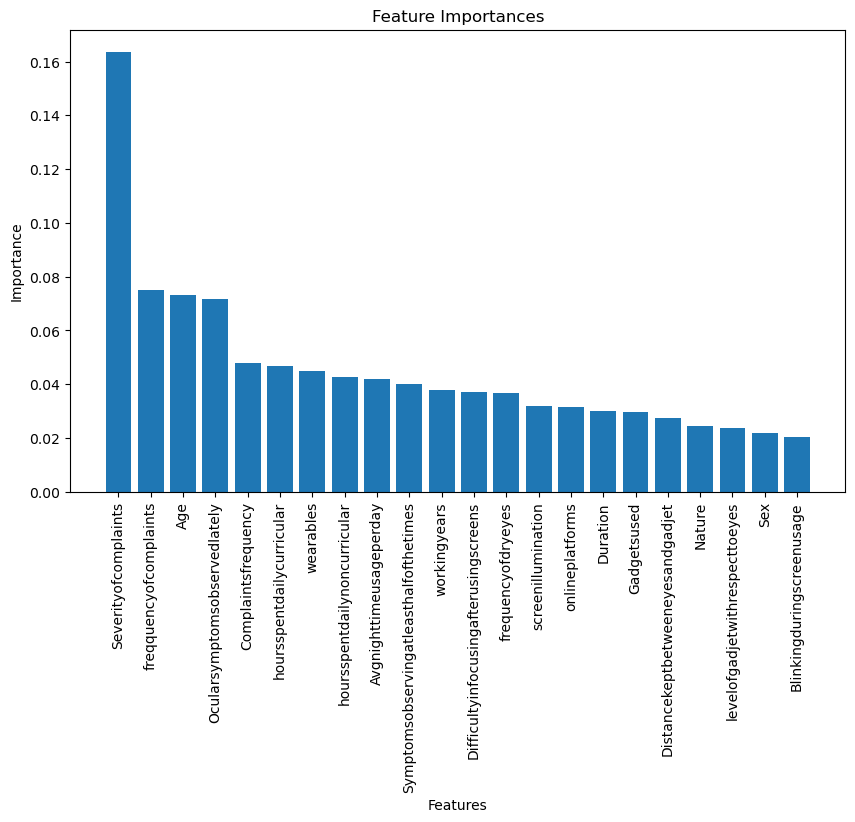

In [295]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Assuming 'X_train' contains your training features and 'y_train' contains your target variable
# Initialize a Random Forest classifier
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train_1, y_train_1)

# Extract feature importances
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train_1.columns, columns=['Importance'])

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


In [296]:


# Drop unnecessary columns
X = df.drop(['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1','onlineplatforms', 
             'Sex', 'Distancekeptbetweeneyesandgadjet', 'Difficultyinfocusingafterusingscreens','screenillumination',
            'Duration'], axis=1)
# X = df[['Severityofcomplaints','freqquencyofcomplaints','Age','Ocularsymptomsobservedlately','hoursspentdailynoncurricular','Complaintsfrequency']]
y1 = df['Schimers1Lefteye_1'] 
y2 = df['Schimers1righteye_1'] 
y3 = df['Schimers2Lefteye_1'] 
y4 = df['Schimers2righteye_1'] 
# Encode categorical variables if needed
# For example, if any other columns contain non-numeric data
# encoder = LabelEncoder()
# data['SomeColumn'] = encoder.fit_transform(data['SomeColumn'])



# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2= train_test_split(X, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.2, random_state=42)


# Initialize decision tree classifier
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = DecisionTreeClassifier(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf1.fit(X_train1, y_train1)
clf2.fit(X_train2, y_train2)
clf3.fit(X_train3, y_train3)
clf4.fit(X_train4, y_train4)

# Make predictions
y_pred1 = clf1.predict(X_test1)
y_pred2 = clf2.predict(X_test2)
y_pred3 = clf3.predict(X_test3)
y_pred4 = clf4.predict(X_test4)

# Evaluate the model
accuracy1 = accuracy_score(y_test1, y_pred1)
accuracy2 = accuracy_score(y_test2, y_pred2)
accuracy3 = accuracy_score(y_test3, y_pred3)
accuracy4 = accuracy_score(y_test4, y_pred4)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)
print("Accuracy3:", accuracy3)
print("Accuracy4:", accuracy4)

# Classification report
print("\nClassification Report1:")
print(classification_report(y_test1, y_pred1))

print("\nClassification Report2:")
print(classification_report(y_test2, y_pred2))

print("\nClassification Report3:")
print(classification_report(y_test3, y_pred3))

print("\nClassification Report4:")
print(classification_report(y_test4, y_pred4))

# Confusion matrix
print("\nConfusion Matrix1:")
print(confusion_matrix(y_test1, y_pred1))

# Confusion matrix
print("\nConfusion Matrix2:")
print(confusion_matrix(y_test2, y_pred2))

# Confusion matrix
print("\nConfusion Matrix3:")
print(confusion_matrix(y_test3, y_pred3))

# Confusion matrix
print("\nConfusion Matrix4:")
print(confusion_matrix(y_test4, y_pred4))




Accuracy1: 0.7333333333333333
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Classification Report1:
              precision    recall  f1-score   support

           0       0.40      0.31      0.35        13
           1       0.17      0.33      0.22         3
           2       0.89      0.89      0.89        44

    accuracy                           0.73        60
   macro avg       0.48      0.51      0.49        60
weighted avg       0.74      0.73      0.74        60


Classification Report2:
              precision    recall  f1-score   support

           0       0.27      0.33      0.30         9
           1       0.75      1.00      0.86         3
           2       0.89      0.85      0.87        47
           3       0.00      0.00      0.00         1

    accuracy                           0.77        60
   macro avg       0.48      0.55      0.51        60
weighted avg       0.77      0.77      0.77        60


Classificatio

C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [297]:
validation_data=pd.read_excel('C:\\Users\\saira\\OneDrive\\Desktop\\DigitalEye\\valid.xlsx')
validation_data.info()
X_val = validation_data.drop(['Name','onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet',
             'Duration', 'Difficultyinfocusingafterusingscreens', 'screenillumination'], axis=1)

# Make predictions on the validation dataset
y_val_pred1 = clf1.predict(X_val)
y_val_pred2 = clf2.predict(X_val)
y_val_pred3 = clf3.predict(X_val)
y_val_pred4 = clf4.predict(X_val)

# Print predicted values
print("Predicted values for Schimers1Lefteye_1:")
print(y_val_pred1)

print("\nPredicted values for Schimers1righteye_1:")
print(y_val_pred2)

print("\nPredicted values for Schimers2Lefteye_1:")
print(y_val_pred3)

print("\nPredicted values for Schimers2righteye_1:")
print(y_val_pred4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Name                                    9 non-null      object
 1   Age                                     9 non-null      int64 
 2   Sex                                     9 non-null      int64 
 3   wearables                               9 non-null      int64 
 4   Duration                                9 non-null      int64 
 5   onlineplatforms                         9 non-null      int64 
 6   Nature                                  9 non-null      int64 
 7   screenillumination                      9 non-null      int64 
 8   workingyears                            9 non-null      int64 
 9   hoursspentdailycurricular               9 non-null      int64 
 10  hoursspentdailynoncurricular            9 non-null      int64 
 11  Gadgetsuse

In [298]:


# Drop unnecessary columns
X = df.drop(['Schimers1Lefteye_1', 'Schimers1righteye_1', 'Schimers2Lefteye_1', 'Schimers2righteye_1','onlineplatforms',
            'onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 'levelofgadjetwithrespecttoeyes', 'Duration', 
             'Difficultyinfocusingafterusingscreens', 'frequencyofdryeyes','screenillumination'
], axis=1)
# X = df[['Severityofcomplaints','freqquencyofcomplaints','Age','Ocularsymptomsobservedlately','hoursspentdailynoncurricular','Complaintsfrequency']]
y1 = df['Schimers1Lefteye_1'] 
y2 = df['Schimers1righteye_1'] 
y3 = df['Schimers2Lefteye_1'] 
y4 = df['Schimers2righteye_1'] 
# Encode categorical variables if needed
# For example, if any other columns contain non-numeric data
# encoder = LabelEncoder()
# data['SomeColumn'] = encoder.fit_transform(data['SomeColumn'])



# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2= train_test_split(X, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.2, random_state=42)


# Initialize decision tree classifier
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = DecisionTreeClassifier(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf1.fit(X_train1, y_train1)
clf2.fit(X_train2, y_train2)
clf3.fit(X_train3, y_train3)
clf4.fit(X_train4, y_train4)

# Make predictions
y_pred1 = clf1.predict(X_test1)
y_pred2 = clf2.predict(X_test2)
y_pred3 = clf3.predict(X_test3)
y_pred4 = clf4.predict(X_test4)

# Evaluate the model
accuracy1 = accuracy_score(y_test1, y_pred1)
accuracy2 = accuracy_score(y_test2, y_pred2)
accuracy3 = accuracy_score(y_test3, y_pred3)
accuracy4 = accuracy_score(y_test4, y_pred4)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)
print("Accuracy3:", accuracy3)
print("Accuracy4:", accuracy4)

# Classification report
print("\nClassification Report1:")
print(classification_report(y_test1, y_pred1))

print("\nClassification Report2:")
print(classification_report(y_test2, y_pred2))

print("\nClassification Report3:")
print(classification_report(y_test3, y_pred3))

print("\nClassification Report4:")
print(classification_report(y_test4, y_pred4))

# Confusion matrix
print("\nConfusion Matrix1:")
print(confusion_matrix(y_test1, y_pred1))

# Confusion matrix
print("\nConfusion Matrix2:")
print(confusion_matrix(y_test2, y_pred2))

# Confusion matrix
print("\nConfusion Matrix3:")
print(confusion_matrix(y_test3, y_pred3))

# Confusion matrix
print("\nConfusion Matrix4:")
print(confusion_matrix(y_test4, y_pred4))




Accuracy1: 0.7
Accuracy2: 0.7666666666666667
Accuracy3: 0.9666666666666667
Accuracy4: 0.9333333333333333

Classification Report1:
              precision    recall  f1-score   support

           0       0.33      0.31      0.32        13
           1       0.17      0.33      0.22         3
           2       0.88      0.84      0.86        44

    accuracy                           0.70        60
   macro avg       0.46      0.49      0.47        60
weighted avg       0.73      0.70      0.71        60


Classification Report2:
              precision    recall  f1-score   support

           0       0.22      0.22      0.22         9
           1       0.75      1.00      0.86         3
           2       0.87      0.87      0.87        47
           3       0.00      0.00      0.00         1

    accuracy                           0.77        60
   macro avg       0.46      0.52      0.49        60
weighted avg       0.75      0.77      0.76        60


Classification Report3:
    

C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [299]:
validation_data=pd.read_excel('C:\\Users\\saira\\OneDrive\\Desktop\\DigitalEye\\valid.xlsx')
validation_data.info()
X_val = validation_data.drop(['Name','onlineplatforms', 'Sex', 'Distancekeptbetweeneyesandgadjet', 
                              'levelofgadjetwithrespecttoeyes', 'Duration', 'Difficultyinfocusingafterusingscreens',
                              'frequencyofdryeyes','screenillumination'], axis=1)

# Make predictions on the validation dataset
y_val_pred1 = clf1.predict(X_val)
y_val_pred2 = clf2.predict(X_val)
y_val_pred3 = clf3.predict(X_val)
y_val_pred4 = clf4.predict(X_val)

# Print predicted values
print("Predicted values for Schimers1Lefteye_1:")
print(y_val_pred1)

print("\nPredicted values for Schimers1righteye_1:")
print(y_val_pred2)

print("\nPredicted values for Schimers2Lefteye_1:")
print(y_val_pred3)

print("\nPredicted values for Schimers2righteye_1:")
print(y_val_pred4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Name                                    9 non-null      object
 1   Age                                     9 non-null      int64 
 2   Sex                                     9 non-null      int64 
 3   wearables                               9 non-null      int64 
 4   Duration                                9 non-null      int64 
 5   onlineplatforms                         9 non-null      int64 
 6   Nature                                  9 non-null      int64 
 7   screenillumination                      9 non-null      int64 
 8   workingyears                            9 non-null      int64 
 9   hoursspentdailycurricular               9 non-null      int64 
 10  hoursspentdailynoncurricular            9 non-null      int64 
 11  Gadgetsuse